In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, losses
import seaborn as sns

## Assemble and merge datasets

In [ ]:
#import all 8 datasets
#we readjusted the data columns so that the reviewer can create the metadata programatically
glds_103 = pd.read_csv('GLDS-103_rna_seq_Normalized_Counts.csv', index_col=0)
glds_104 = pd.read_csv('GLDS-104_rna_seq_Normalized_Counts.csv', index_col=0)
glds_105 = pd.read_csv('GLDS-105_rna_seq_Normalized_Counts.csv', index_col=0)
glds_422 = pd.read_csv('GLDS-422_rna_seq_Normalized_Counts.csv', index_col=0)
glds_48 = pd.read_csv('GLDS-48_rna_seq_Normalized_Counts.csv', index_col=0)
glds_511 = pd.read_csv('GLDS-511_rna_seq_Normalized_Counts.csv', index_col=0)
glds_573 = pd.read_csv('GLDS-573_rna_seq_Normalized_Counts.csv', index_col=0)
glds_617 = pd.read_csv('GLDS-617_rna_seq_Normalized_Counts_GLbulkRNAseq.csv', index_col=0)


In [ ]:
glds_105.head(1)

,Mmus_C57-6J_TA_GC_Rep1_M33,Mmus_C57-6J_TA_GC_Rep2_M34,Mmus_C57-6J_TA_GC_Rep3_M35,Mmus_C57-6J_TA_GC_Rep4_M36,Mmus_C57-6J_TA_GC_Rep5_M37,Mmus_C57-6J_TA_GC_Rep6_M38,Mmus_C57-6J_TA_FLT_Rep1_M23,Mmus_C57-6J_TA_FLT_Rep2_M24,Mmus_C57-6J_TA_FLT_Rep3_M25,Mmus_C57-6J_TA_FLT_Rep4_M26,Mmus_C57-6J_TA_FLT_Rep5_M27,Mmus_C57-6J_TA_FLT_Rep6_M28
ENSMUSG00000000001,810.408767,751.72764,698.377727,779.142802,794.74949,771.430387,778.751039,861.009599,821.046302,726.05913,842.427881,814.424088


In [ ]:
#  merge all glds data by the column index into 1 dataframe. ensure the final dataframe is merged by index names. and replace all na with mean of the rows


glds_merged = pd.concat([glds_103, glds_104, glds_105, glds_422, glds_48, glds_511, glds_573, glds_617], axis=1, join='outer')
glds_merged = glds_merged.fillna(glds_merged.mean())
glds_merged = glds_merged.transpose()
glds_merged.head()


,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000120821,ENSMUSG00000120860,ENSMUSG00000120904,ENSMUSG00000120918,ENSMUSG00000120953,ENSMUSG00000121213,ENSMUSG00000121232,ENSMUSG00000121249,ENSMUSG00000121262,ENSMUSG00000121271
Mmus_C57-6J_Quad_FLT_Rep1_M23,648.932003,78.543205,11903.830975,10.767097,7.621889,6133.087440,409.971157,1626.035229,1300.346957,7871.247563,...,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470,2140.315470
Mmus_C57-6J_Quad_FLT_Rep2_M24,718.018860,95.046094,25128.089278,11.670876,12.861093,4535.533570,718.512208,1504.985811,1242.499692,9935.190227,...,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399,2025.633399
Mmus_C57-6J_Quad_FLT_Rep3_M25,616.339550,71.385554,25047.724844,6.646270,2.656537,6345.340936,388.372466,1523.924726,1428.039912,8599.830276,...,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414,2212.331414
Mmus_C57-6J_Quad_FLT_Rep4_M26,720.927934,66.092752,16589.034743,4.786610,7.343329,5570.183381,620.370729,1382.003842,1203.525674,9369.949014,...,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310,1989.545310
Mmus_C57-6J_Quad_FLT_Rep5_M27,795.271988,73.742930,9350.881415,4.357392,4.869140,6378.863123,460.428620,1144.485174,1377.307658,5891.229967,...,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605,2007.603605


In [ ]:
glds_merged.shape

(192, 46775)

# Build Metadata

In [ ]:
#use column naming to create metadata
def process_dataframe(df):
  index_names = df.index.tolist()
  split_names = [name.split('_') for name in index_names]

  first_elements = [name[0] for name in split_names if len(name) > 0]
  third_elements = [name[2] for name in split_names if len(name) > 2]
  fourth_elements = [name[3] for name in split_names if len(name) > 3]

  # One-hot encode the first and third elements
  first_encoded = pd.get_dummies(first_elements, prefix='first').astype(int)
  third_encoded = pd.get_dummies(third_elements, prefix='third').astype(int)

  # Binary encode the fourth element
  unique_fourth = sorted(list(set(fourth_elements)))
  fourth_mapping = {element: i for i, element in enumerate(unique_fourth)}
  fourth_encoded = [fourth_mapping.get(element, -1) for element in fourth_elements]
  fourth_encoded_df = pd.DataFrame({'TreatmentStatus': fourth_encoded})

  processed_df = pd.concat([first_encoded, third_encoded, fourth_encoded_df], axis=1)

  return processed_df


processed_df = process_dataframe(glds_merged)
processed_df.index = glds_merged.index
processed_df.head()


,first_Mmus,first_RNov,third_HRT,third_LVR,third_MG,third_Quad,third_RLG,third_TA,TreatmentStatus
Mmus_C57-6J_Quad_FLT_Rep1_M23,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep2_M24,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep3_M25,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep4_M26,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep5_M27,1,0,0,0,0,1,0,0,0


# Look at data attribute

In [ ]:
processed_df['TreatmentStatus'].value_counts()

,count
TreatmentStatus,
1,127
0,65


In [ ]:
#function for plotting counts and rendering them uniformly
def countPlotter(df, column_name, title, xticklabs = [], savefig = True, figSize = (2,1.5)):
  plt.figure(figsize=figSize)
  ax = sns.countplot(x=column_name, data=df)
  ax.set_xlabel('')
  ax.set_ylabel('Count')
  ax.set_xticklabels(xticklabs)
  plt.title(title)
  if savefig:
    print(f'{title}.png')
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')
  plt.show()



<ipython-input-425-3b001b865590>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabs)


Species.png


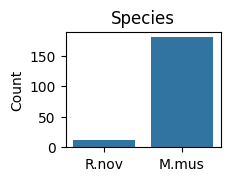

In [ ]:
countPlotter(processed_df, 'first_Mmus', 'Species', xticklabs=['R.nov', 'M.mus'])

In [ ]:
processed_df.ThirdCategory.value_counts().index.tolist()

['third_HRT', 'third_MG', 'third_RLG', 'third_LVR', 'third_Quad', 'third_TA']

<ipython-input-389-6cfe6b3ad263>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabs)


Treatment Status.png


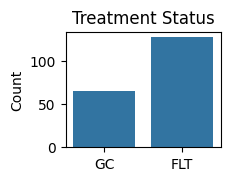

In [ ]:
countPlotter(processed_df, 'TreatmentStatus', 'Treatment Status', xticklabs=['GC', 'FLT'])

# Merge one hot encoding metadata with omic data

In [ ]:
#   concatenate merged_df and processed_df horizontally.

combined_df = pd.concat([glds_merged, processed_df], axis=1)
combined_df.head()

,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000121271,first_Mmus,first_RNov,third_HRT,third_LVR,third_MG,third_Quad,third_RLG,third_TA,TreatmentStatus
Mmus_C57-6J_Quad_FLT_Rep1_M23,648.932003,78.543205,11903.830975,10.767097,7.621889,6133.087440,409.971157,1626.035229,1300.346957,7871.247563,...,2140.315470,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep2_M24,718.018860,95.046094,25128.089278,11.670876,12.861093,4535.533570,718.512208,1504.985811,1242.499692,9935.190227,...,2025.633399,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep3_M25,616.339550,71.385554,25047.724844,6.646270,2.656537,6345.340936,388.372466,1523.924726,1428.039912,8599.830276,...,2212.331414,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep4_M26,720.927934,66.092752,16589.034743,4.786610,7.343329,5570.183381,620.370729,1382.003842,1203.525674,9369.949014,...,1989.545310,1,0,0,0,0,1,0,0,0
Mmus_C57-6J_Quad_FLT_Rep5_M27,795.271988,73.742930,9350.881415,4.357392,4.869140,6378.863123,460.428620,1144.485174,1377.307658,5891.229967,...,2007.603605,1,0,0,0,0,1,0,0,0


In [ ]:
combined_df.shape

(192, 46784)

# Build the DL model (CoVAE)

### 1. Data Preprocessing

In [ ]:
#if methylation data is available, we will unhash the methylation lines to integrate them
#
# Split gene expression, methylation, and treatment status
X_expression = combined_df.iloc[:, : combined_df.shape[1]-2 ].values
#X_methylation = df.iloc[:, num_genes:num_genes + num_methylation].values
y_treatment = combined_df['TreatmentStatus'].values

# Normalize the gene expression and methylation data (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler_expression = MinMaxScaler()
#scaler_methylation = MinMaxScaler()

X_expression_scaled = scaler_expression.fit_transform(X_expression)
#X_methylation_scaled = scaler_methylation.fit_transform(X_methylation)

# Combine scaled features into a single input matrix
X_scaled = np.hstack([X_expression_scaled])#, X_methylation_scaled])

In [ ]:
# Split data into train/test sets
# we set seed for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_treatment, test_size=0.3, random_state=42)


In [ ]:
# get the index of x_test within x_scaled : for plotting later on


test_indices = []
for test_row in X_test:
  index_in_scaled = np.where((X_scaled == test_row).all(axis=1))[0]
  if len(index_in_scaled) > 0:
    test_indices.append(index_in_scaled[0])
  else:

    print("Warning: Test row not found exactly in X_scaled.")
    closest_index = np.argmin(np.linalg.norm(X_scaled - test_row, axis=1))
    test_indices.append(closest_index)

print("Indices of X_test within X_scaled:", test_indices)


Indices of X_test within X_scaled: [45, 136, 76, 143, 113, 177, 15, 18, 16, 9, 78, 112, 66, 65, 153, 30, 145, 69, 111, 68, 171, 154, 118, 98, 67, 115, 24, 158, 60, 141, 114, 166, 19, 90, 170, 5, 133, 142, 165, 82, 109, 162, 35, 135, 42, 182, 101, 55, 75, 126, 29, 156, 56, 51, 163, 38, 31, 155]


In [ ]:
# get the index of x_train within x_scaled : for plotting later on


import numpy as np

train_indices = []
for train_row in X_train:
  index_in_scaled = np.where((X_scaled == train_row).all(axis=1))[0]
  if len(index_in_scaled) > 0:
    train_indices.append(index_in_scaled[0])
  else:

    print("Warning: Train row not found exactly in X_scaled.")
    closest_index = np.argmin(np.linalg.norm(X_scaled - train_row, axis=1))
    train_indices.append(closest_index)

print("Indices of X_train within X_scaled:", train_indices)


Indices of X_train within X_scaled: [12, 41, 159, 189, 184, 97, 26, 123, 85, 95, 2, 46, 100, 93, 128, 36, 180, 22, 183, 117, 127, 11, 119, 152, 6, 27, 104, 4, 32, 124, 138, 122, 137, 10, 62, 96, 139, 0, 172, 146, 70, 187, 64, 44, 120, 28, 40, 148, 175, 25, 23, 144, 140, 81, 108, 79, 84, 39, 125, 86, 77, 186, 161, 47, 94, 147, 190, 61, 73, 33, 43, 132, 3, 105, 53, 173, 150, 178, 49, 80, 34, 7, 110, 91, 83, 169, 174, 89, 8, 13, 59, 164, 131, 17, 72, 168, 134, 167, 176, 63, 54, 107, 50, 188, 58, 48, 88, 21, 57, 160, 185, 129, 37, 157, 181, 1, 52, 149, 130, 151, 103, 99, 116, 87, 74, 121, 191, 20, 71, 106, 14, 92, 179, 102]


### 2. Build the Compositional Autoencoder Model

In [ ]:

class CompositionalAutoencoder(Model):
    def __init__(self, input_dim, latent_dim, treatment_dim):
        super(CompositionalAutoencoder, self).__init__()
        # Encoder network
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(input_dim,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(latent_dim, activation='relu')  # Latent space
        ])

        # Treatment effect function applied to latent space
        self.treatment_function = tf.keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(treatment_dim, activation='relu'),
            layers.Dense(latent_dim, activation='relu')  # Adjust latent space for treatment
        ])

        # Decoder network
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(input_dim, activation='sigmoid')  # Reconstruct input features (expression + methylation)
        ])

    def call(self, inputs):
        # Inputs consist of features and treatment status
        X, treatment = inputs
        # Encode the input data
        latent_basal = self.encoder(X)

        # Apply the treatment function (compositional effect) based on treatment status
        treatment_effect = self.treatment_function(latent_basal)

        # Reshape treatment to be compatible with treatment_effect
        treatment = tf.reshape(treatment, [-1, 1])

        # Cast treatment to float32 to match the type of treatment_effect
        treatment = tf.cast(treatment, dtype=tf.float32)

        # Combine basal and treatment effect in the latent space
        latent_combined = latent_basal + treatment * treatment_effect

        # Decode back to the original input space (predict treated or untreated states)
        decoded_output = self.decoder(latent_combined)
        return decoded_output

### 3. Training the Autoencoder

In [ ]:

# Hyperparameters
input_dim = X_train.shape[1]  # Number of features (expression + methylation)
latent_dim = 200  # Dimensionality of the latent space
treatment_dim = 2  # Size of the treatment adjustment: control and treated

# Create an instance of the autoencoder model
autoencoder = CompositionalAutoencoder(input_dim=input_dim, latent_dim=latent_dim, treatment_dim=treatment_dim)

# Compile the model with an optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Train the model:
history = autoencoder.fit((X_train, y_train), X_train, epochs=32, batch_size=10, validation_data=((X_test, y_test), X_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - loss: 0.1290 - val_loss: 0.0549
Epoch 2/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.0642 - val_loss: 0.0506
Epoch 3/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0495 - val_loss: 0.0299
Epoch 4/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0355 - val_loss: 0.0195
Epoch 5/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0232 - val_loss: 0.0125
Epoch 6/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 7/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - loss: 0.0108 - val_loss: 0.0076
Epoch 8/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - loss: 0.0107 - val_loss: 0.0049
Epoch 9/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 10/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 11/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 12/32
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step

### 4. Evaluation

In [ ]:

# Evaluate on test data
test_loss = autoencoder.evaluate((X_test, y_test), X_test)
print(f"Test Loss: {test_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0033
Test Loss: 0.0030227992683649063


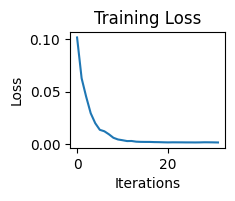

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,1.5))

plt.plot(history.history['loss'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.savefig("training_loss.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# For example, predict treated states based on new basal data: the X_test
predicted_treated = autoencoder.predict((X_test, np.ones(X_test.shape[0])))  # Treat as treated samples

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [ ]:
predicted_From_Xtrain = autoencoder.predict((X_train, np.ones(X_train.shape[0])))  # Treat as treated samples

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(predicted_treated[0], X_test[0])
print(f"MSE: {mse}")

# Calculate accuracy (assuming binary classification - presence/absence of treatment effect)
# You might need to adapt this based on your specific problem and definition of accuracy

threshold = 0.5  # Example threshold for binary classification
predicted_treated_binary = (predicted_treated[0] > threshold).astype(int)
x_test_binary = (X_test[0] > threshold).astype(int)

accuracy = np.mean(predicted_treated_binary == x_test_binary)
print(f"Accuracy: {accuracy}")


MSE: 0.002341455372169895
Accuracy: 0.9350177418665299


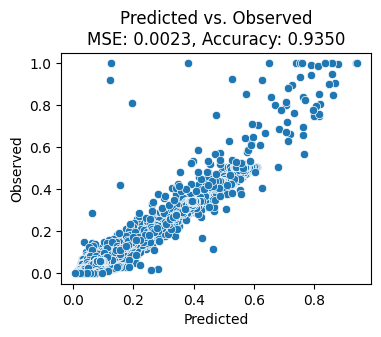

In [ ]:
#  add the MSE AND ACCURACY SCORE ON THE PLOT



plt.figure(figsize=(4,3))
sns.scatterplot(x=predicted_treated[0], y=X_test[0])
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title(f"Predicted vs. Observed\nMSE: {mse:.4f}, Accuracy: {accuracy:.4f}")
plt.savefig("predicted_vs_observed.png", dpi=300, bbox_inches='tight')
plt.show()


# Data Exploration

### Important Functions for Plotting and data exploration

In [ ]:
#plot any given gene profile across several samples
def PlottingProfiles(covariate,
                     geneNumber,
                     legendName,
                     figSize = (3,3),
                     predicted_treated = predicted_treated,
                     X_test = X_test,
                     savefile = True,
                     legendHandles = None):

  plt.figure(figsize=figSize)
  sns.scatterplot(x=predicted_treated[:, geneNumber],
                  y=X_test[:, geneNumber],
                  color='blue',
                  alpha=0.7,
                  s=50,
                  hue = combined_df[covariate][test_indices],
                  edgecolors = 'black')
  plt.xlabel("Predicted Profile", fontsize=10, fontweight = 'bold')
  plt.ylabel("Actual Profile", fontsize=10, fontweight = 'bold')
  plt.title(combined_df.columns[geneNumber], fontsize=10, fontweight = 'bold')

  plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=8)
  plt.tight_layout()  # Improve spacing
  sns.despine()
  plt.legend(title = legendName)
  print(combined_df.columns[geneNumber]) # for searching on genecards


  #fix legend labels
  if legendHandles is not None:
    plt.legend(title = legendName, labels = legendHandles)
  else:
    plt.legend(title = legendName)

  if savefile:
    plt.savefig(f'{combined_df.columns[geneNumber]}.png', dpi=300, bbox_inches='tight')
    plt.show()

  else:
    plt.show()


<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000028


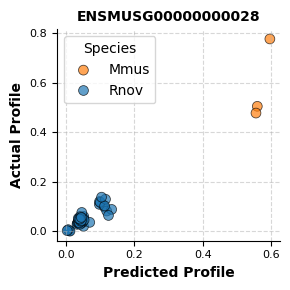

In [ ]:
#testing
PlottingProfiles('first_RNov', geneNumber=1, legendName = 'Species', legendHandles=['Mmus', 'Rnov'], savefile=False)

### ranking gene importance across different modalities


In [ ]:
#ranking gene importance across different modalities

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

def rank_genes_by_clustering(actual_values, predicted_values, treatment_status):
    """
    Ranks genes by how well they cluster based on treatment status using F-statistic and Silhouette Score.

    Parameters:
    - actual_values: numpy array of shape (n_genes, n_samples), actual gene expression values.
    - predicted_values: numpy array of shape (n_genes, n_samples), predicted gene expression values.
    - treatment_status: numpy array of shape (n_samples,), binary array indicating treatment status (0 or 1).

    Returns:
    - rankings: numpy array of shape (n_genes, 3) where each row corresponds to a gene, and columns are:
      - gene index
      - F-statistic score
      - Silhouette score
      - Combined score (e.g., mean of F-statistic and Silhouette Score)
    """
    n_genes = actual_values.shape[0]
    rankings = []

    # Iterate through each gene to compute the F-statistic and Silhouette score
    for gene_idx in range(n_genes):
        # Extract the actual and predicted values for the current gene
        gene_actual = actual_values[ :, gene_idx]
        gene_predicted = predicted_values[ :, gene_idx]

        # Prepare the data as a 2D array of points [actual, predicted] for clustering
        gene_data = np.vstack((gene_actual, gene_predicted)).T

        # Calculate the F-statistic (Variance Ratio Criterion) using f_classif
        # Ensure treatment_status matches the number of samples in gene_data
        f_stat, _ = f_classif(gene_data, treatment_status)
        f_stat = f_stat[0]  # We only care about the F-statistic (not the p-value)

        # Calculate the Silhouette Score using KMeans clustering (with 2 clusters for binary treatment status)
        kmeans = KMeans(n_clusters=2, random_state=42).fit(gene_data)
        sil_score = silhouette_score(gene_data, kmeans.labels_)

        # Compute a combined score (could be a weighted average, or just mean for now)
        combined_score = (f_stat + sil_score) / 2

        # Append the results: [gene_idx, F-statistic, Silhouette Score, Combined score]
        rankings.append([gene_idx, f_stat, sil_score, combined_score])

    # Convert rankings to numpy array for easy sorting
    rankings = np.array(rankings)

    # Sort by the First statistic
    sorted_rankings = rankings[np.argsort(rankings[:, 1])[::-1]]

    return pd.DataFrame(sorted_rankings.tolist(), columns=['GeneIndex', 'FStatistic', 'SilhouetteScore', 'CombinedScore'])

In [ ]:
#print the top 5 by TreatmentStatus
rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['TreatmentStatus'][train_indices]).head(10)

<ipython-input-395-22a54e31f0cd>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['TreatmentStatus'][train_indices]).head(10)


,GeneIndex,FStatistic,SilhouetteScore,CombinedScore
0,7.0,11.205185,0.654868,5.930026
1,20.0,9.776854,0.703377,5.240115
2,46.0,7.551045,0.773562,4.162303
3,6.0,6.818497,0.824079,3.821288
4,129.0,6.539639,0.611836,3.575738
5,14.0,6.503884,0.766620,3.635252
6,100.0,6.344775,0.935056,3.639915
7,30.0,6.314245,0.941165,3.627705
8,85.0,6.260388,0.938296,3.599342
9,26.0,5.942832,0.866106,3.404469


<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000149


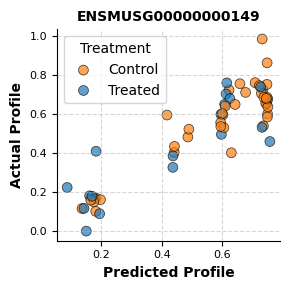

In [ ]:
PlottingProfiles('TreatmentStatus', geneNumber=20, legendName = 'Treatment', legendHandles=['Control', 'Treated'], savefile=True)

<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000743


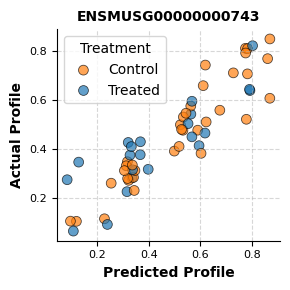

In [ ]:
PlottingProfiles('TreatmentStatus', geneNumber=114, legendName = 'Treatment', legendHandles=['Control', 'Treated'], savefile=True)

In [ ]:
#print the top BY SPECIES
rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).head(10)

<ipython-input-446-c86b0417c49d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).head(10)


,GeneIndex,FStatistic,SilhouetteScore,CombinedScore
0,69.0,2143.203986,0.974859,1072.089423
1,121.0,2113.924054,0.972013,1057.448033
2,23.0,2085.564478,0.970905,1043.267691
3,36.0,2043.029446,0.971734,1022.000590
4,12.0,1456.474105,0.942923,728.708514
5,60.0,1412.648729,0.939680,706.794205
6,66.0,1153.324651,0.931811,577.128231
7,10.0,1014.072152,0.913753,507.492952
8,1.0,959.928777,0.915053,480.421915
9,71.0,943.064245,0.911767,471.988006


<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000402


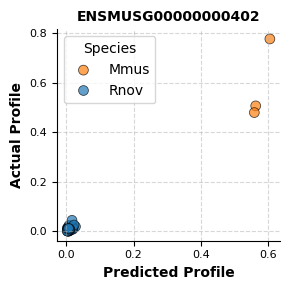

In [ ]:
PlottingProfiles('first_RNov', geneNumber=69, legendName = 'Species', legendHandles=['Mmus', 'Rnov'])

In [ ]:
#from the tail; least
rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).tail(5)

<ipython-input-454-a39c9fe901e0>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).tail(5)


,GeneIndex,FStatistic,SilhouetteScore,CombinedScore
129,130.0,0.105155,0.887970,0.496562
130,16.0,0.097059,0.803213,0.450136
131,13.0,0.067084,0.910060,0.488572
132,94.0,0.003854,0.587701,0.295778
133,101.0,0.001766,0.880207,0.440986


<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000673


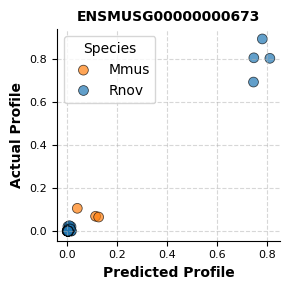

In [ ]:
PlottingProfiles('first_RNov', geneNumber=101, legendName = 'Species', legendHandles=['Mmus', 'Rnov'])

## For organs, recompose the one hot encoding to a single column

In [ ]:

# Filter columns with 'third' in their names
third_columns = [col for col in processed_df.columns if 'third' in col]

# Create a new DataFrame with only the 'third' columns
third_df = processed_df[third_columns]

# Use idxmax to find the column with the maximum value for each row
third_categories = third_df.idxmax(axis=1)

# Create a new DataFrame with the merged categories
organs_df = pd.DataFrame({'ThirdCategory': third_categories})

# Print the new DataFrame
organs_df.head()

combined_df = pd.concat([combined_df, organs_df], axis=1)
processed_df = pd.concat([processed_df, organs_df], axis=1)


In [ ]:
#remove third from the output of processed_df.ThirdCategory.value_counts().index.tolist()

organs = processed_df.ThirdCategory.value_counts().index.tolist()
new_organs = [category.replace('third_', '') for category in categories]
print(new_organs)


['HRT', 'MG', 'RLG', 'LVR', 'Quad', 'TA']


<ipython-input-425-3b001b865590>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabs)


Organs.png


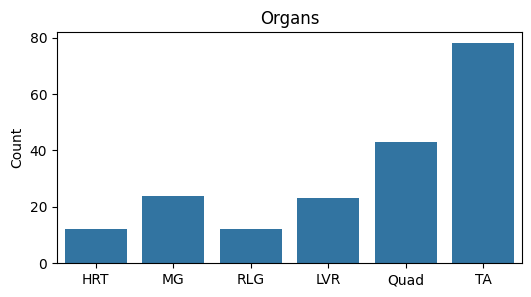

In [ ]:
countPlotter(processed_df, 'ThirdCategory', 'Organs', xticklabs=new_organs, figSize=(6,3))


In [ ]:
#print the top 5 that cluster by organs
rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['ThirdCategory'][train_indices]).head(10)

<ipython-input-409-24fc3a2fb69f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['ThirdCategory'][train_indices]).head(10)


,GeneIndex,FStatistic,SilhouetteScore,CombinedScore
0,0.0,753.270862,0.873276,377.072069
1,16.0,383.824085,0.803213,192.313649
2,6.0,312.228128,0.824079,156.526103
3,93.0,303.551052,0.858582,152.204817
4,46.0,287.041752,0.773562,143.907657
5,18.0,270.991745,0.769916,135.880830
6,78.0,250.047737,0.640926,125.344332
7,81.0,243.611403,0.762176,122.186789
8,63.0,239.326763,0.770154,120.048458
9,7.0,229.074721,0.654868,114.864794


<ipython-input-371-f668eaa34535>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hue = combined_df[covariate][test_indices],


ENSMUSG00000000131


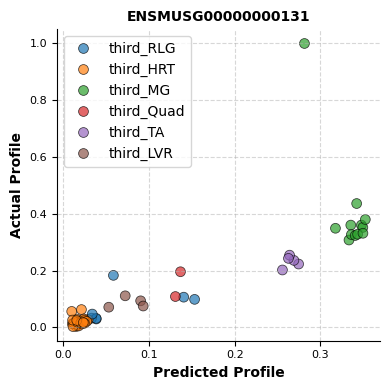

In [ ]:
PlottingProfiles('ThirdCategory', geneNumber=16, legendName='', figSize=(4,4), savefile=True)#, legendHandles=['RLG', 'HRT', 'MG', 'RLG', 'Quad', 'TA', 'LVR'])

# Visualizing The Functional Enrichment


### TREATMENT STATUS

In [ ]:
#get top 50 genes with treatment specific response
top50ind =  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['TreatmentStatus'][train_indices]).head(50)['GeneIndex'].tolist()

top50ind_int = [int(x) for x in top50ind]
combined_df.columns[top50ind_int].tolist()

<ipython-input-463-4841a97a9958>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top50ind =  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['TreatmentStatus'][train_indices]).head(50)['GeneIndex'].tolist()


['ENSMUSG00000000078',
 'ENSMUSG00000000149',
 'ENSMUSG00000000296',
 'ENSMUSG00000000058',
 'ENSMUSG00000000827',
 'ENSMUSG00000000126',
 'ENSMUSG00000000632',
 'ENSMUSG00000000202',
 'ENSMUSG00000000560',
 'ENSMUSG00000000183',
 'ENSMUSG00000000346',
 'ENSMUSG00000000184',
 'ENSMUSG00000000216',
 'ENSMUSG00000000838',
 'ENSMUSG00000000600',
 'ENSMUSG00000000247',
 'ENSMUSG00000000094',
 'ENSMUSG00000000214',
 'ENSMUSG00000000794',
 'ENSMUSG00000000365',
 'ENSMUSG00000000402',
 'ENSMUSG00000000739',
 'ENSMUSG00000000791',
 'ENSMUSG00000000120',
 'ENSMUSG00000000305',
 'ENSMUSG00000000552',
 'ENSMUSG00000000093',
 'ENSMUSG00000000085',
 'ENSMUSG00000000167',
 'ENSMUSG00000000303',
 'ENSMUSG00000000435',
 'ENSMUSG00000000340',
 'ENSMUSG00000000673',
 'ENSMUSG00000000690',
 'ENSMUSG00000000001',
 'ENSMUSG00000000420',
 'ENSMUSG00000000568',
 'ENSMUSG00000000386',
 'ENSMUSG00000000740',
 'ENSMUSG00000000385',
 'ENSMUSG00000000530',
 'ENSMUSG00000000562',
 'ENSMUSG00000000301',
 'ENSMUSG00

In [ ]:
# export list of genes to https://biit.cs.ut.ee/gprofiler/gost:
#Our result is hosted at: https://biit.cs.ut.ee/gplink/l/tm-AlxbGS6

In [ ]:
enrichmentData = pd.read_csv('/content/gProfiler_mmusculus_27-09-2024_04-37-03__intersections.csv', sep = ',')
enrichmentData.head()

,source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections
0,GO:MF,protein binding,GO:0005515,True,0.000051,4.288610,10460,48,38,25063,"ENSMUSG00000000149,ENSMUSG00000000296,ENSMUSG0..."
1,GO:MF,binding,GO:0005488,False,0.009461,2.024052,16378,48,44,25063,"ENSMUSG00000000078,ENSMUSG00000000149,ENSMUSG0..."
2,GO:BP,anatomical structure development,GO:0048856,True,0.000127,3.894591,6269,49,29,26944,"ENSMUSG00000000149,ENSMUSG00000000058,ENSMUSG0..."
3,GO:BP,developmental process,GO:0032502,False,0.000219,3.658952,6854,49,30,26944,"ENSMUSG00000000149,ENSMUSG00000000058,ENSMUSG0..."
4,GO:BP,anatomical structure morphogenesis,GO:0009653,False,0.000234,3.631270,2761,49,19,26944,"ENSMUSG00000000149,ENSMUSG00000000126,ENSMUSG0..."


<ipython-input-479-94e05e798042>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


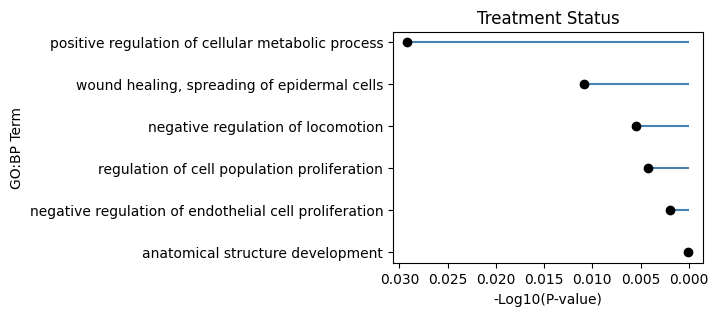

In [ ]:

# Filter the data for GO:BP source and highlighted rows
go_bp_highlighted = enrichmentData[(enrichmentData['source'] == 'GO:BP') & (enrichmentData['highlighted'] == True)]

# Create a lollipop plot
plt.figure(figsize=(4,3))
plt.hlines(y=go_bp_highlighted['term_name'], xmin=0, xmax=go_bp_highlighted['adjusted_p_value'], color='steelblue')
plt.plot(go_bp_highlighted['adjusted_p_value'], go_bp_highlighted['term_name'], "o", color='black')
plt.xlabel('-Log10(P-value)')
plt.ylabel('GO:BP Term')
plt.title('Treatment Status')
plt.tight_layout()
plt.savefig('functional_enrichment.png', dpi=300, bbox_inches='tight')
plt.gca().invert_xaxis()  # Invert x-axis for better visualization
plt.show()


## Species specificity

In [ ]:
#get top 50 genes with treatment specific response
top50ind =  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).head(50)['GeneIndex'].tolist()

top50ind_int = [int(x) for x in top50ind]
combined_df.columns[top50ind_int].tolist()

<ipython-input-480-ab8fba033dac>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top50ind =  rank_genes_by_clustering(X_train, predicted_From_Xtrain, combined_df['first_RNov'][train_indices]).head(50)['GeneIndex'].tolist()


['ENSMUSG00000000402',
 'ENSMUSG00000000791',
 'ENSMUSG00000000167',
 'ENSMUSG00000000247',
 'ENSMUSG00000000120',
 'ENSMUSG00000000359',
 'ENSMUSG00000000386',
 'ENSMUSG00000000093',
 'ENSMUSG00000000028',
 'ENSMUSG00000000416',
 'ENSMUSG00000000531',
 'ENSMUSG00000000739',
 'ENSMUSG00000000204',
 'ENSMUSG00000000305',
 'ENSMUSG00000000295',
 'ENSMUSG00000000693',
 'ENSMUSG00000000244',
 'ENSMUSG00000000317',
 'ENSMUSG00000000126',
 'ENSMUSG00000000355',
 'ENSMUSG00000000037',
 'ENSMUSG00000000197',
 'ENSMUSG00000000562',
 'ENSMUSG00000000435',
 'ENSMUSG00000000627',
 'ENSMUSG00000000690',
 'ENSMUSG00000000776',
 'ENSMUSG00000000094',
 'ENSMUSG00000000320',
 'ENSMUSG00000000214',
 'ENSMUSG00000000148',
 'ENSMUSG00000000183',
 'ENSMUSG00000000811',
 'ENSMUSG00000000339',
 'ENSMUSG00000000861',
 'ENSMUSG00000000282',
 'ENSMUSG00000000579',
 'ENSMUSG00000000296',
 'ENSMUSG00000000276',
 'ENSMUSG00000000486',
 'ENSMUSG00000000794',
 'ENSMUSG00000000805',
 'ENSMUSG00000000632',
 'ENSMUSG00

In [ ]:
#result hosted at : https://biit.cs.ut.ee/gplink/l/RZkaN31YTI

In [ ]:
enrichmentData = pd.read_csv('/content/gProfiler_mmusculus_27-09-2024_04-55-12__intersections.csv', sep = ',')
enrichmentData

,source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections
0,GO:MF,protein binding,GO:0005515,True,0.022542,1.647006,10460,50,35,25063,"ENSMUSG00000000791,ENSMUSG00000000167,ENSMUSG0..."
1,GO:MF,binding,GO:0005488,False,0.028836,1.540061,16378,50,45,25063,"ENSMUSG00000000402,ENSMUSG00000000791,ENSMUSG0..."
2,GO:BP,anatomical structure morphogenesis,GO:0009653,True,0.000234,3.631270,2761,49,19,26944,"ENSMUSG00000000247,ENSMUSG00000000120,ENSMUSG0..."
3,GO:BP,skeletal system morphogenesis,GO:0048705,False,0.000548,3.261342,248,49,7,26944,"ENSMUSG00000000126,ENSMUSG00000000435,ENSMUSG0..."
4,GO:BP,system development,GO:0048731,False,0.001342,2.872350,4117,49,22,26944,"ENSMUSG00000000247,ENSMUSG00000000120,ENSMUSG0..."
5,GO:BP,regulation of multicellular organismal process,GO:0051239,False,0.001967,2.706091,3165,49,19,26944,"ENSMUSG00000000791,ENSMUSG00000000247,ENSMUSG0..."
6,GO:BP,embryo development,GO:0009790,False,0.002871,2.541916,1243,49,12,26944,"ENSMUSG00000000247,ENSMUSG00000000093,ENSMUSG0..."
7,GO:BP,embryonic morphogenesis,GO:0048598,False,0.003821,2.417844,648,49,9,26944,"ENSMUSG00000000247,ENSMUSG00000000093,ENSMUSG0..."
8,GO:BP,negative regulation of developmental process,GO:0051093,False,0.004963,2.304260,1078,49,11,26944,"ENSMUSG00000000247,ENSMUSG00000000120,ENSMUSG0..."
9,GO:BP,multicellular organism development,GO:0007275,False,0.006071,2.216755,4879,49,23,26944,"ENSMUSG00000000247,ENSMUSG00000000120,ENSMUSG0..."


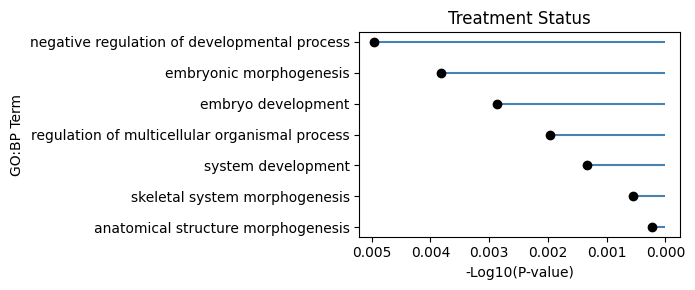

In [ ]:

# Filter the data for GO:BP source and highlighted rows
go_bp_highlighted = enrichmentData[(enrichmentData['source'] == 'GO:BP')].head(7)

# Create a lollipop plot
plt.figure(figsize=(7,3))
plt.hlines(y=go_bp_highlighted['term_name'], xmin=0, xmax=go_bp_highlighted['adjusted_p_value'], color='steelblue')
plt.plot(go_bp_highlighted['adjusted_p_value'], go_bp_highlighted['term_name'], "o", color='black')
plt.xlabel('-Log10(P-value)')
plt.ylabel('GO:BP Term')
plt.title('Treatment Status')
plt.tight_layout()
plt.savefig('Species Specific.png', dpi=300, bbox_inches='tight')
plt.gca().invert_xaxis()  # Invert x-axis for better visualization
plt.show()
